In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pa
from scipy.linalg import svd, diagsvd

In [2]:
!kaggle datasets download -d rounakbanik/the-movies-dataset 

Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0




  0%|          | 0.00/228M [00:00<?, ?B/s]
  0%|          | 1.00M/228M [00:00<03:22, 1.17MB/s]
  1%|          | 2.00M/228M [00:01<02:14, 1.76MB/s]
  1%|▏         | 3.00M/228M [00:01<01:59, 1.98MB/s]
  2%|▏         | 4.00M/228M [00:02<02:05, 1.86MB/s]
  2%|▏         | 5.00M/228M [00:02<01:53, 2.06MB/s]
  3%|▎         | 6.00M/228M [00:03<01:49, 2.12MB/s]
  3%|▎         | 7.00M/228M [00:03<02:00, 1.91MB/s]
  4%|▎         | 8.00M/228M [00:04<01:53, 2.03MB/s]
  4%|▍         | 9.00M/228M [00:04<01:37, 2.34MB/s]
  4%|▍         | 10.0M/228M [00:04<01:26, 2.65MB/s]
  5%|▍         | 11.0M/228M [00:05<01:23, 2.72MB/s]
  5%|▌         | 12.0M/228M [00:05<01:28, 2.57MB/s]
  6%|▌         | 13.0M/228M [00:06<01:24, 2.67MB/s]
  6%|▌         | 14.0M/228M [00:06<01:32, 2.42MB/s]
  7%|▋         | 15.0M/228M [00:07<01:29, 2.49MB/s]
  7%|▋         | 16.0M/228M [00:07<01:25, 2.61MB/s]
  7%|▋         | 17.0M/228M [00:07<01:23, 2.66MB/s]
  8%|▊         | 18.0M/228M [00:08<01:20, 2.72MB/s]
  8%|▊         | 19.

In [3]:
import zipfile
import os

zip_file_path = 'the-movies-dataset.zip'

extract_to = 'data'

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

os.remove(zip_file_path)

In [4]:
import pandas as pd
df = pd.read_csv('data/ratings_small.csv')

notas = df[['userId', 'movieId', 'rating']]
matriz_notas = notas.pivot(index='userId', columns='movieId', values='rating').fillna(0)

matriz_notas


movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
exps = 1000
erros = []

alt = matriz_notas.shape[0]
lar = matriz_notas.shape[1]
while exps < 1000:
    i = np.random.randint(0, alt)
    j = np.random.randint(0, lar)
    
    valor_original = matriz_notas.iloc[i, j]
    
    if valor_original == 0:
        continue
    
    m_corrompida = matriz_notas.copy()
    m_corrompida.iloc[i, j] = np.random.uniform(0, 5)
    
    U, sigma, VT = svd(m_corrompida.values, full_matrices=False) 
     sigma[-140:] *= 0 
    Sigma = np.diag(sigma)
    B = np.dot(U, np.dot(Sigma, VT))
    valor_prev = B[i, j]
    erro = valor_original - valor_prev
    erros.append(error)
 


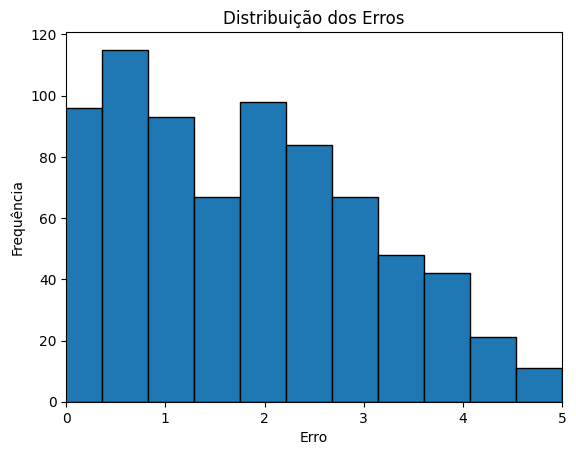

In [18]:
plt.hist(erros, bins=20, edgecolor='black')
plt.xlim(0, 5)
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.title('Distribuição dos Erros')
plt.show()
